In [5]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

df  = pd.read_csv("/content/creditcard.csv")[:80_000]
df.head(80000)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,58284,1.216664,0.249684,0.174210,0.510376,-0.179497,-0.560982,-0.021601,-0.028357,-0.179274,-0.112919,1.309070,0.722206,0.024770,-0.073315,0.438072,0.780292,-0.365029,0.326964,0.212787,-0.049519,-0.253330,-0.797699,0.069440,-0.041220,0.220108,0.096814,-0.030399,0.018715,11.99,0.0
79996,58284,-0.690760,1.331928,0.913395,0.111679,-0.344744,-1.041187,0.340727,0.379708,-0.492570,-0.725864,-0.440533,-0.175328,-0.299903,-0.017137,0.907764,0.527965,0.204175,-0.039421,-0.094320,-0.012731,-0.223222,-0.739941,0.060943,0.319461,-0.150171,0.075715,0.115052,0.034766,9.99,0.0
79997,58285,-2.287270,1.121568,1.163585,0.948471,-1.490482,1.046850,-0.699580,1.584645,-0.717062,-0.954794,0.501476,1.175644,0.378114,0.756961,0.358987,0.301812,0.269831,0.586977,0.571730,-0.323816,0.243795,0.398433,-0.048050,-0.282601,0.233288,-0.252045,-0.409044,-0.253114,102.08,0.0
79998,58286,-1.350941,0.233411,0.950824,1.023505,0.415847,-0.505863,0.711381,-0.070386,-0.193938,0.208942,-0.406974,-0.549137,-0.888598,0.415234,1.472159,-0.525311,0.088762,-0.239321,0.136668,-0.313279,0.026327,0.595887,0.461400,0.066594,-0.158632,-0.273392,0.350422,0.140851,67.50,0.0


In [6]:
X = df.drop(columns=['Time', 'Amount', 'Class']).values
y = df['Class'].values
f"Shapes of X={X.shape} y={y.shape}, #Fraud Cases={y.sum()}"

'Shapes of X=(80000, 28) y=(80000,), #Fraud Cases=196.0'

In [7]:
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression(max_iter=1000)
mod.fit(X, y).predict(X).sum()

151.0

In [8]:
from sklearn.linear_model import LogisticRegression

#class_weight : dict or 'balanced', default=None
#Weights associated with classes in the form {class_label: weight}.
#If not given, all classes are supposed to have weight one.
mod = LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=1000)
mod.fit(X, y).predict(X).sum()

171.0

In [9]:
from sklearn.model_selection import GridSearchCV


#GridSearchCV implements a "fit" and a "score" method.
#It also implements "score_samples", "predict", "predict_proba",
#"decision_function", "transform" and "inverse_transform" if they are
#implemented in the estimator used.
grid = GridSearchCV(
    estimator = LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in range(1, 4)]}, #setting to loop over
    cv=4,
    n_jobs=-1 #this grid search appear a paralel
)
grid.fit(X, y)


GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]})

In [13]:
#Where the this scores comes from even the gris doesnt have any metris is 
lr = LogisticRegression()
??lr.score #this shows the implementation of it
#it says unless we pecify score for LogisticRegression just gioing to be accuracy

In [10]:
grid.cv_results_

{'mean_fit_time': array([1.8960197 , 1.55637306, 1.5070166 ]),
 'mean_score_time': array([0.00518435, 0.00526911, 0.00432384]),
 'mean_test_score': array([0.9974125, 0.996575 , 0.995875 ]),
 'param_class_weight': masked_array(data=[{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'class_weight': {0: 1, 1: 1}},
  {'class_weight': {0: 1, 1: 2}},
  {'class_weight': {0: 1, 1: 3}}],
 'rank_test_score': array([1, 2, 3], dtype=int32),
 'split0_test_score': array([0.99405, 0.99025, 0.9873 ]),
 'split1_test_score': array([0.99835, 0.9984 , 0.99845]),
 'split2_test_score': array([0.99945, 0.9996 , 0.9996 ]),
 'split3_test_score': array([0.9978 , 0.99805, 0.99815]),
 'std_fit_time': array([0.17419669, 0.46529582, 0.1569929 ]),
 'std_score_time': array([0.00022984, 0.00052024, 0.00066938]),
 'std_test_score': array([0.0020302 , 0.0036967 , 0.00498027])}

In [11]:
pd.DataFrame(grid.cv_results_)
#this score the grid serch use to choose best model

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,1.896020,0.174197,0.005184,0.000230,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.99405,0.99835,0.99945,0.99780,0.997413,0.002030,1
1,1.556373,0.465296,0.005269,0.000520,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.99025,0.99840,0.99960,0.99805,0.996575,0.003697,2
2,1.507017,0.156993,0.004324,0.000669,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.98730,0.99845,0.99960,0.99815,0.995875,0.004980,3


#With make_scorer: 

In [15]:
from sklearn.metrics import precision_score, recall_score, make_scorer
#recall_score gives that did I get all the froud cases
#precision_score gives me that I predict froud ho accurate am i 
recall_score(y, grid.predict(X))

0.5918367346938775

In [16]:
grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]},
    scoring={'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score)},
    refit='precision',
    return_train_score=True,
    cv=10,
    n_jobs=-1
)
grid.fit(X, y);

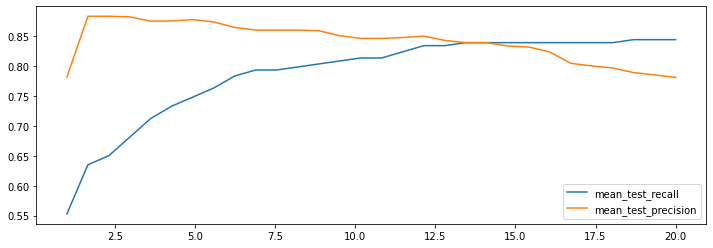

In [17]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot([_[1] for _ in df_results['param_class_weight']], 
             df_results[score], 
             label=score)
plt.legend();

In [18]:
#we will create our own metric like f1 to find the best between recall and precision
#find the min of recall and precision
def min_recall_precision(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]},
    scoring={'precision': make_scorer(precision_score),
             'recall': make_scorer(recall_score), 
             'min_both': make_scorer(min_recall_precision)},
    refit='min_both',
    return_train_score=True,
    cv=10,
    n_jobs=-1
)
grid.fit(X, y);

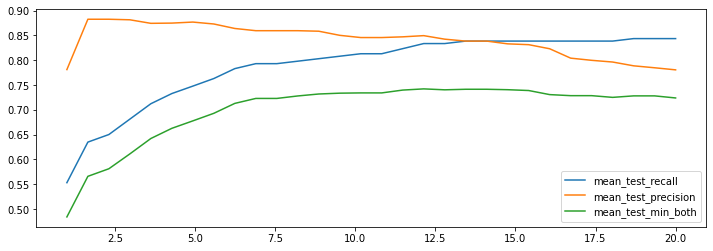

In [19]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision', 'mean_test_min_both']:
    plt.plot([_[1] for _ in df_results['param_class_weight']], 
             df_results[score], 
             label=score)
plt.legend();

#Without make_scorer

In [20]:
s = make_scorer(min_recall_precision)
??s
#Signature:      s(estimator, X, y_true, sample_weight=None)
#sample_weight=None ---> this says hey this row more important the other rows pay attantion
#Type:           _PredictScorer
#like F(y_true, y_pred) ==make_scorer==> s(est, X, y, w)
#we can do all this without make_scorer using its signature

In [22]:
def min_recall_precision(est, X, y_true, sample_weight=None):
    y_pred = est.predict(X)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]},
    scoring={'precision': make_scorer(precision_score), 
             'recall': make_scorer(recall_score),
             'min_both': min_recall_precision},
    refit='min_both',
    return_train_score=True,
    cv=10,
    n_jobs=-1
)
grid.fit(X, y, sample_weight= np.log(1 + df['Amount'])); #take  log for no to over fit

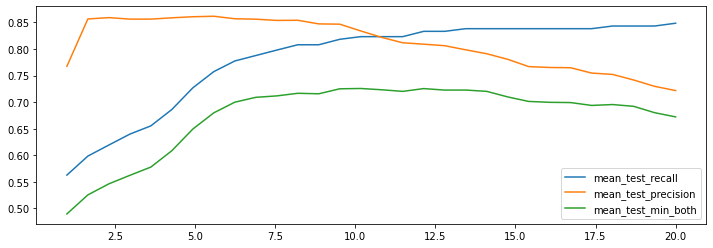

In [23]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision', 'mean_test_min_both']:
    plt.plot([_[1] for _ in df_results['param_class_weight']], 
             df_results[score], 
             label=score)
plt.legend();
#Balance is changed , sample weight definetly effects the algorithm

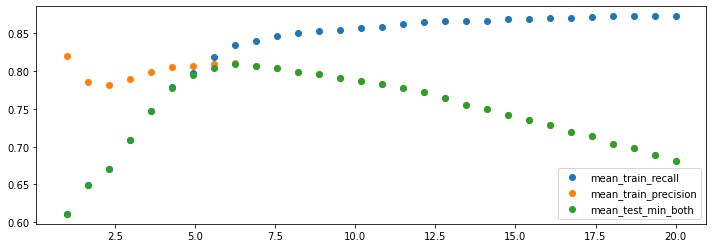

In [24]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_train_recall', 'mean_train_precision', 'mean_test_min_both']:
    plt.scatter(x=[_[1] for _ in df_results['param_class_weight']], 
                y=df_results[score.replace('test', 'train')], 
                label=score)
plt.legend();

#Using Outlier Detection Models
In this data set froud is a outliner that it is rare and not ordinary. But when we write froud detection algorithm might not corralate with froud. we will try to replace LogisticRegression with a out llne detector and adopt this in the metric to check if its the case

In [27]:
from collections import Counter
from sklearn.ensemble import IsolationForest #outline detector algorithm
mod = IsolationForest().fit(X) #when we say fit it just need data set
mod.predict(X)
Counter(mod.predict(X)) #it shows that -1 is a outliner

Counter({-1: 3223, 1: 76777})

In [29]:
np.where(mod.predict(X) == -1, 1, 0)#if predict -1 I want 1 else 0

array([0, 0, 0, ..., 0, 0, 0])

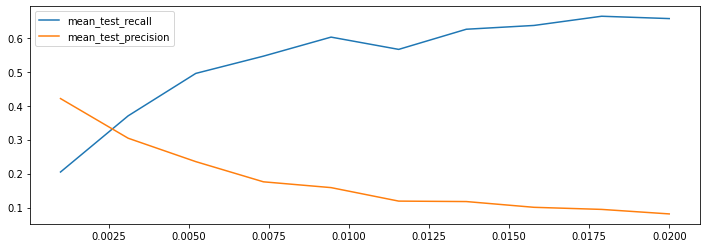

In [30]:
def outlier_precision(mod, X, y): #own costum metric
    preds = mod.predict(X)
    return precision_score(y, np.where(preds == -1, 1, 0))

def outlier_recall(mod, X, y):  #own costum metric
    preds = mod.predict(X)
    return recall_score(y, np.where(preds == -1, 1, 0))

grid = GridSearchCV(
    estimator=IsolationForest(),
    param_grid={'contamination': np.linspace(0.001, 0.02, 10)}, #contamination as a hyperprameter that I want to tune
    scoring={'precision': outlier_precision, 
             'recall': outlier_recall},
    refit='precision',
    cv=5,
    n_jobs=-1
)
grid.fit(X, y);

plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot(df_results['param_contamination'], 
             df_results[score], 
             label=score)
plt.legend();
